In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report
import scikitplot as skplt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('flights_total_ATL_Arr_Delay.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90707 entries, 0 to 90706
Columns: 202 entries, Unnamed: 0 to DEST_XNA
dtypes: float64(186), int64(15), object(1)
memory usage: 139.8+ MB


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,TAXI_OUT,ARR_DELAY_NEW,DISTANCE,Ort_Rüzgar,Ort_Sýcaklýk,TMAX,TMIN,2Dk_max_rüzgar,5Dk_max_rüzgar,DEP_TIME_hour,DEP_TIME_min,WHEELS_OFF_hour,WHEELS_OFF_min,OP_CARRIER_9E,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_MQ,OP_CARRIER_NK,OP_CARRIER_OH,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_WN,OP_CARRIER_YV,OP_CARRIER_YX,DEST_ABE,DEST_ABQ,DEST_ABY,DEST_ACY,DEST_AEX,DEST_AGS,DEST_ALB,DEST_ANC,DEST_ASE,DEST_ATW,DEST_AUS,DEST_AVL,DEST_AVP,DEST_BDL,DEST_BHM,DEST_BMI,DEST_BNA,DEST_BOS,DEST_BQK,DEST_BTR,DEST_BTV,DEST_BUF,DEST_BUR,DEST_BWI,DEST_BZN,DEST_CAE,DEST_CAK,DEST_CHA,DEST_CHO,DEST_CHS,DEST_CID,DEST_CLE,DEST_CLT,DEST_CMH,DEST_COS,DEST_CRW,DEST_CSG,DEST_CVG,DEST_DAB,DEST_DAL,DEST_DAY,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DHN,DEST_DSM,DEST_DTW,DEST_ECP,DEST_EGE,DEST_ELM,DEST_ELP,DEST_EVV,DEST_EWN,DEST_EWR,DEST_EYW,DEST_FAR,DEST_FAY,DEST_FCA,DEST_FLL,DEST_FNT,DEST_FSD,DEST_FSM,DEST_FWA,DEST_GNV,DEST_GPT,DEST_GRB,DEST_GRR,DEST_GSO,DEST_GSP,DEST_GTR,DEST_HDN,DEST_HHH,DEST_HNL,DEST_HOU,DEST_HPN,DEST_HSV,DEST_IAD,DEST_IAH,DEST_ICT,DEST_ILM,DEST_IND,DEST_ISP,DEST_JAC,DEST_JAN,DEST_JAX,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LEX,DEST_LFT,DEST_LGA,DEST_LIT,DEST_LNK,DEST_MCI,DEST_MCO,DEST_MDT,DEST_MDW,DEST_MEM,DEST_MGM,DEST_MHT,DEST_MIA,DEST_MKE,DEST_MLB,DEST_MLI,DEST_MLU,DEST_MOB,DEST_MSN,DEST_MSO,DEST_MSP,DEST_MSY,DEST_MTJ,DEST_MYR,DEST_OAJ,DEST_OAK,DEST_OKC,DEST_OMA,DEST_ONT,DEST_ORD,DEST_ORF,DEST_PBI,DEST_PDX,DEST_PHF,DEST_PHL,DEST_PHX,DEST_PIA,DEST_PIT,DEST_PNS,DEST_PSP,DEST_PVD,DEST_PWM,DEST_RAP,DEST_RDU,DEST_RIC,DEST_RNO,DEST_ROA,DEST_ROC,DEST_RST,DEST_RSW,DEST_SAN,DEST_SAT,DEST_SAV,DEST_SBN,DEST_SDF,DEST_SEA,DEST_SFO,DEST_SGF,DEST_SHV,DEST_SJC,DEST_SJU,DEST_SLC,DEST_SMF,DEST_SNA,DEST_SRQ,DEST_STL,DEST_STT,DEST_STX,DEST_SYR,DEST_TLH,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VLD,DEST_VPS,DEST_XNA
0,24,2019,1,5,6,38,14,Delay 30-60 min,581,13.42,49,59,44,23.9,33.1,15,36,15,50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,2019,1,5,6,24,12,Delay 15-30 min,534,13.42,49,59,44,23.9,33.1,6,9,6,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34,2019,1,5,6,0,41,Delay 5-15 min,606,13.42,49,59,44,23.9,33.1,15,37,16,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

Delay class:
 Delay 5-15 min     29474
Delay 15-30 min    24373
Delay 30-60 min    18913
Delay 60+          17947
Name: ARR_DELAY_NEW, dtype: int64


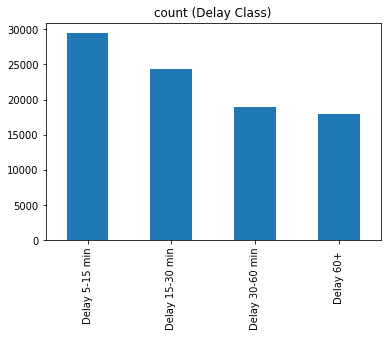

In [6]:
print("Delay class:\n",df['ARR_DELAY_NEW'].value_counts())# plot the count after under-sampeling
df['ARR_DELAY_NEW'].value_counts().plot(kind='bar', title='count (Delay Class)');

In [7]:
df.shape

(90707, 201)

In [8]:
def feature_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [9]:
x = df.drop(columns = ['ARR_DELAY_NEW'])
y = df['ARR_DELAY_NEW']

# AdaBoost

## AdaBoost Base Model

In [10]:
x_ada_imbalanced_train, x_ada_imbalanced_test, y_ada_imbalanced_train, y_ada_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [11]:
ada_imbalanced= AdaBoostClassifier().fit(x_ada_imbalanced_train, y_ada_imbalanced_train)
ada_imbalanced_pred = ada_imbalanced.predict(x_ada_imbalanced_test)
ada_imbalanced.score(x_ada_imbalanced_test, y_ada_imbalanced_test)

0.6937125638481608

In [12]:
print(classification_report(y_ada_imbalanced_test, ada_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.58      0.45      0.51      7727
Delay 30-60 min       0.72      0.55      0.62      5325
 Delay 5-15 min       0.68      0.89      0.77     10274
     Delay 60+        0.88      0.85      0.87      3887

       accuracy                           0.69     27213
      macro avg       0.72      0.69      0.69     27213
   weighted avg       0.69      0.69      0.68     27213



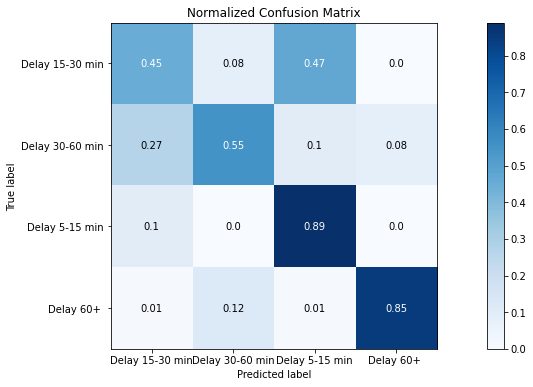

In [13]:
skplt.metrics.plot_confusion_matrix(y_ada_imbalanced_test, ada_imbalanced_pred, figsize=(18,6),  normalize=True)
plt.show()

## AdaBoost Model with SMOTE

In [14]:
x_ada_balanced_with_smote_train, x_ada_balanced_with_smote_test, y_ada_balanced_with_smote_train, y_ada_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [15]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ada_balanced_with_smote_train_reshape, y_ada_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_ada_balanced_with_smote_train, y_ada_balanced_with_smote_train)

In [16]:
ada_balanced_with_smote= AdaBoostClassifier().fit(x_ada_balanced_with_smote_train_reshape, y_ada_balanced_with_smote_train_reshape)
ada_balanced_with_smote_pred = ada_balanced_with_smote.predict(x_ada_balanced_with_smote_test)
ada_balanced_with_smote.score(x_ada_balanced_with_smote_test, y_ada_balanced_with_smote_test)

0.686069158122956

In [17]:
print(classification_report(y_ada_balanced_with_smote_test, ada_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.55      0.49      0.52      7727
Delay 30-60 min       0.69      0.59      0.63      5325
 Delay 5-15 min       0.70      0.82      0.76     10274
     Delay 60+        0.90      0.84      0.87      3887

       accuracy                           0.69     27213
      macro avg       0.71      0.69      0.69     27213
   weighted avg       0.68      0.69      0.68     27213



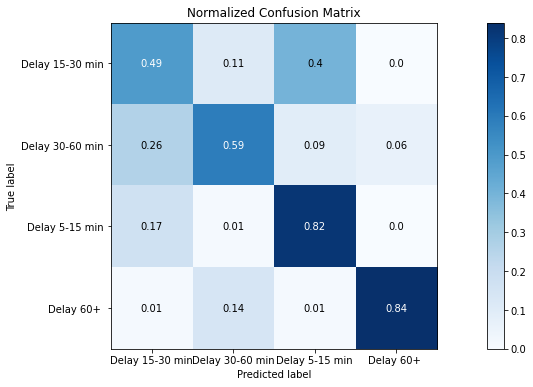

In [18]:
skplt.metrics.plot_confusion_matrix(y_ada_balanced_with_smote_test, ada_balanced_with_smote_pred, figsize=(18,6), normalize=True)
plt.show()

## AdaBoost Feature Importance

In [19]:
len(ada_balanced_with_smote.feature_importances_)

200

In [20]:
ada_balanced_with_smote.feature_importances_

array([0.  , 0.  , 0.  , 0.02, 0.34, 0.14, 0.  , 0.  , 0.02, 0.  , 0.02,
       0.02, 0.02, 0.04, 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.  , 0.12,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.02, 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [21]:
pd.set_option('display.max_rows', None)
feature_importance_columns_ada_balanced_with_smote = feature_importance(ada_balanced_with_smote, x);
feature_importance_columns_ada_balanced_with_smote

,columns,importance
4,DEP_DELAY_NEW,0.34
5,TAXI_OUT,0.14
21,OP_CARRIER_DL,0.12
13,DEP_TIME_hour,0.04
31,OP_CARRIER_YX,0.02
126,DEST_MCO,0.02
74,DEST_DEN,0.02
182,DEST_SMF,0.02
49,DEST_BOS,0.02
71,DEST_DAL,0.02


In [22]:
feature_importance_drop_ada_balanced_with_smote = feature_importance_columns_ada_balanced_with_smote[feature_importance_columns_ada_balanced_with_smote.importance > 0.005]

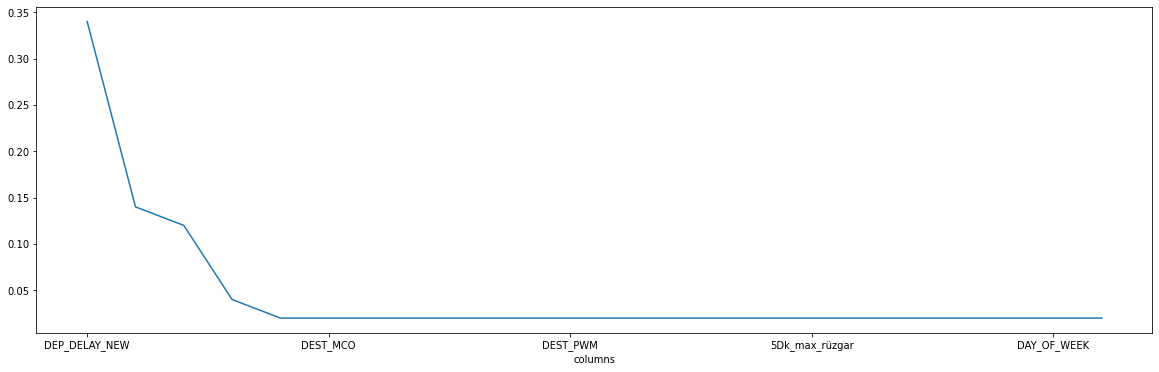

In [23]:
feature_importance_drop_ada_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [24]:
keep_columns_ada_balanced_with_smote = feature_importance_columns_ada_balanced_with_smote[feature_importance_columns_ada_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_ada_balanced_with_smote)

22

In [25]:
keep_columns_ada_balanced_with_smote

4        DEP_DELAY_NEW
5             TAXI_OUT
21       OP_CARRIER_DL
13       DEP_TIME_hour
31       OP_CARRIER_YX
126           DEST_MCO
74            DEST_DEN
182           DEST_SMF
49            DEST_BOS
71            DEST_DAL
161           DEST_PWM
158           DEST_PNS
16      WHEELS_OFF_min
15     WHEELS_OFF_hour
75            DEST_DFW
12      5Dk_max_rüzgar
11      2Dk_max_rüzgar
10                TMIN
8         Ort_Sýcaklýk
59            DEST_CHA
3          DAY_OF_WEEK
132           DEST_MIA
Name: columns, dtype: object

### AdaBoost Feature Importance Model

In [26]:
df_keep_ada_balanced_with_smote = df[keep_columns_ada_balanced_with_smote]
x_ada_feature_importance = df_keep_ada_balanced_with_smote
y_ada_feature_importance = df['ARR_DELAY_NEW']
x_ada_feature_importance_train, x_ada_feature_importance_test, y_ada_feature_importance_train, y_ada_feature_importance_test =     train_test_split(x_ada_feature_importance, y_ada_feature_importance, test_size=0.30, shuffle=False)

In [27]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=6, random_state=2)
x_ada_feature_importance_train_reshape, y_ada_feature_importance_train_reshape = smote_reshape.fit_resample(x_ada_feature_importance_train, y_ada_feature_importance_train)

In [28]:
ada_balanced_with_smote_feature_importance= AdaBoostClassifier().fit(x_ada_feature_importance_train_reshape,                                                                                            y_ada_feature_importance_train_reshape)
ada_balanced_with_smote_feature_importance_pred = ada_balanced_with_smote_feature_importance.predict(x_ada_feature_importance_test)
ada_balanced_with_smote_feature_importance.score(x_ada_feature_importance_test, y_ada_feature_importance_test)

0.6865836181236908

In [29]:
print(classification_report(y_ada_feature_importance_test, ada_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.55      0.50      0.52      7727
Delay 30-60 min       0.68      0.60      0.64      5325
 Delay 5-15 min       0.71      0.81      0.76     10274
     Delay 60+        0.90      0.84      0.87      3887

       accuracy                           0.69     27213
      macro avg       0.71      0.69      0.70     27213
   weighted avg       0.68      0.69      0.68     27213



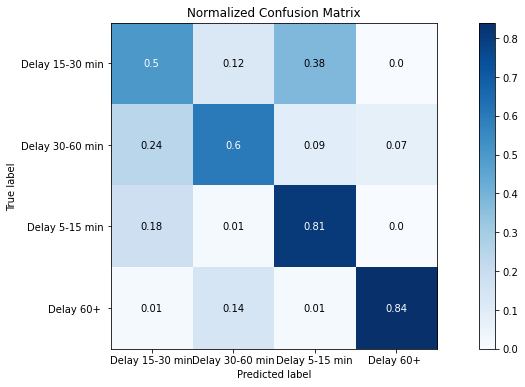

In [30]:
skplt.metrics.plot_confusion_matrix(y_ada_feature_importance_test, ada_balanced_with_smote_feature_importance_pred, figsize=(15,6), normalize=True)
plt.show()

# Gradient Boosting

## Gradient Boosting Base Model

In [31]:
x_gbc_imbalanced_train, x_gbc_imbalanced_test, y_gbc_imbalanced_train, y_gbc_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [32]:
gbc_imbalanced= GradientBoostingClassifier().fit(x_gbc_imbalanced_train,                                                                                                            y_gbc_imbalanced_train)
gbc_imbalanced_pred = gbc_imbalanced.predict(x_gbc_imbalanced_test)
gbc_imbalanced.score(x_gbc_imbalanced_test, y_gbc_imbalanced_test)

0.7256090838937272

In [33]:
print(classification_report(y_gbc_imbalanced_test, gbc_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.62      0.47      0.54      7727
Delay 30-60 min       0.79      0.64      0.71      5325
 Delay 5-15 min       0.69      0.90      0.78     10274
     Delay 60+        0.95      0.87      0.91      3887

       accuracy                           0.73     27213
      macro avg       0.76      0.72      0.73     27213
   weighted avg       0.73      0.73      0.72     27213



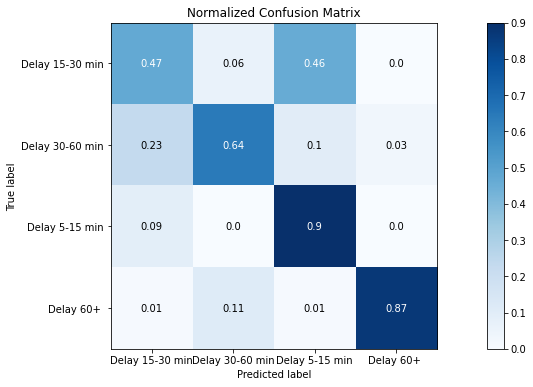

In [34]:
skplt.metrics.plot_confusion_matrix(y_gbc_imbalanced_test, gbc_imbalanced_pred, figsize=(18,6), normalize=True)
plt.show()

## Gradient Boosting Model with SMOTE

In [35]:
x_gbc_balanced_with_smote_train, x_gbc_balanced_with_smote_test, y_gbc_balanced_with_smote_train, y_gbc_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [36]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_gbc_balanced_with_smote_train_reshape, y_gbc_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_gbc_balanced_with_smote_train, y_gbc_balanced_with_smote_train)

In [37]:
gbc_balanced_with_smote= GradientBoostingClassifier().fit(x_gbc_balanced_with_smote_train_reshape,                                                                                           y_gbc_balanced_with_smote_train_reshape)
gbc_balanced_with_smote_pred = gbc_balanced_with_smote.predict(x_gbc_balanced_with_smote_test)
gbc_balanced_with_smote.score(x_gbc_balanced_with_smote_test, y_gbc_balanced_with_smote_test)

0.7261235438944622

In [38]:
print(classification_report(y_gbc_balanced_with_smote_test, gbc_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.63      0.47      0.53      7727
Delay 30-60 min       0.77      0.66      0.71      5325
 Delay 5-15 min       0.69      0.90      0.78     10274
     Delay 60+        0.95      0.87      0.91      3887

       accuracy                           0.73     27213
      macro avg       0.76      0.72      0.73     27213
   weighted avg       0.73      0.73      0.72     27213



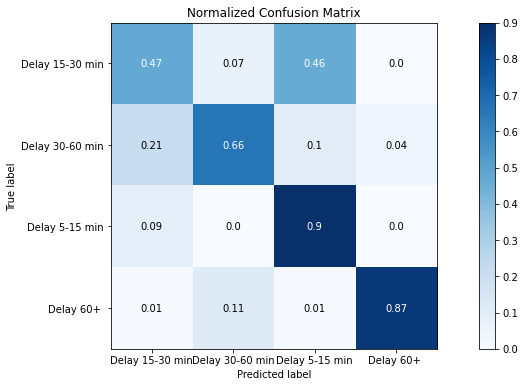

In [39]:
skplt.metrics.plot_confusion_matrix(y_gbc_balanced_with_smote_test, gbc_balanced_with_smote_pred, figsize=(15,6), normalize=True)
plt.show()

## Gradient Boosting Feature Importance

In [40]:
len(gbc_balanced_with_smote.feature_importances_)

200

In [41]:
gbc_balanced_with_smote.feature_importances_

array([0.00000000e+00, 4.37893783e-04, 4.17929329e-04, 1.60642863e-04,
       8.65289136e-01, 1.14291286e-01, 6.16574231e-03, 2.49200130e-04,
       3.72173678e-04, 6.48832872e-04, 4.70550356e-04, 1.00574225e-03,
       4.10407465e-04, 6.62209335e-04, 2.57823987e-04, 5.67893860e-04,
       3.78139424e-04, 1.22957499e-04, 4.13418245e-05, 0.00000000e+00,
       0.00000000e+00, 3.46197701e-03, 2.70899741e-05, 5.44863868e-06,
       1.31526002e-05, 4.99740881e-04, 1.39176996e-04, 1.88211769e-04,
       2.02491965e-05, 3.07293891e-05, 0.00000000e+00, 1.12730337e-04,
       0.00000000e+00, 3.81385639e-06, 2.05467149e-05, 1.36085265e-05,
       4.49354884e-05, 0.00000000e+00, 0.00000000e+00, 5.10452065e-05,
       2.71216559e-06, 1.45170207e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.99274933e-05, 0.00000000e+00, 1.62667272e-05,
       2.59411540e-05, 5.97414874e-06, 0.00000000e+00, 3.49428152e-06,
       2.17800508e-05, 1.49059762e-05, 0.00000000e+00, 1.56672479e-05,
      

In [42]:
pd.set_option('display.max_rows', None)
feature_importance_columns_gbc_balanced_with_smote = feature_importance(gbc_balanced_with_smote, x);
feature_importance_columns_gbc_balanced_with_smote

,columns,importance
4,DEP_DELAY_NEW,0.865289
5,TAXI_OUT,0.114291
6,DISTANCE,0.006166
21,OP_CARRIER_DL,0.003462
11,2Dk_max_rüzgar,0.001006
13,DEP_TIME_hour,0.000662
9,TMAX,0.000649
15,WHEELS_OFF_hour,0.000568
25,OP_CARRIER_NK,0.000500
10,TMIN,0.000471


In [43]:
feature_importance_drop_gbc_balanced_with_smote = feature_importance_columns_gbc_balanced_with_smote[feature_importance_columns_gbc_balanced_with_smote.importance > 0.005]

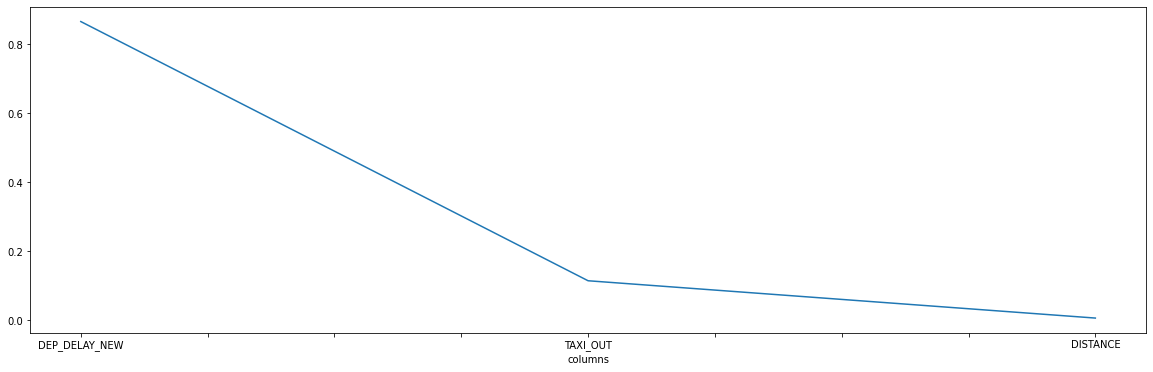

In [44]:
feature_importance_drop_gbc_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [45]:
keep_columns_gbc_balanced_with_smote = feature_importance_columns_gbc_balanced_with_smote[feature_importance_columns_gbc_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_gbc_balanced_with_smote)

3

In [46]:
keep_columns_gbc_balanced_with_smote

4    DEP_DELAY_NEW
5         TAXI_OUT
6         DISTANCE
Name: columns, dtype: object

### Gradient Boosting Feature Importance Model

In [47]:
df_keep_gbc_balanced_with_smote = df[keep_columns_gbc_balanced_with_smote]
x_gbc_feature_importance = df_keep_gbc_balanced_with_smote
y_gbc_feature_importance = df['ARR_DELAY_NEW']
x_gbc_feature_importance_train, x_gbc_feature_importance_test, y_gbc_feature_importance_train, y_gbc_feature_importance_test =     train_test_split(x_gbc_feature_importance, y_gbc_feature_importance, test_size=0.30, shuffle=False)

In [48]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_gbc_feature_importance_train_reshape, y_gbc_feature_importance_train_reshape = smote_reshape.fit_resample(x_gbc_feature_importance_train, y_gbc_feature_importance_train)

In [49]:
gbc_balanced_with_smote_feature_importance= GradientBoostingClassifier().fit(x_gbc_feature_importance_train_reshape,                                                                                            y_gbc_feature_importance_train_reshape)
gbc_balanced_with_smote_feature_importance_pred = gbc_balanced_with_smote_feature_importance.predict(x_gbc_feature_importance_test)
gbc_balanced_with_smote_feature_importance.score(x_gbc_feature_importance_test, y_gbc_feature_importance_test)

0.7306801896152574

In [50]:
print(classification_report(y_gbc_feature_importance_test, gbc_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.63      0.49      0.55      7727
Delay 30-60 min       0.76      0.67      0.72      5325
 Delay 5-15 min       0.70      0.89      0.79     10274
     Delay 60+        0.94      0.87      0.91      3887

       accuracy                           0.73     27213
      macro avg       0.76      0.73      0.74     27213
   weighted avg       0.73      0.73      0.72     27213



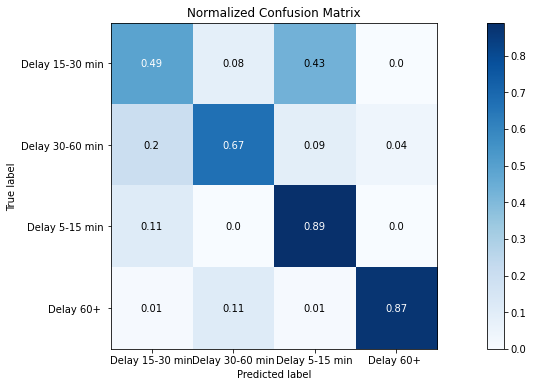

In [51]:
skplt.metrics.plot_confusion_matrix(y_gbc_feature_importance_test, gbc_balanced_with_smote_feature_importance_pred, figsize=(18,6),normalize=True)
plt.show()

# Random Forest

## Random Forest Base Model

In [52]:
x_rf_imbalanced_train, x_rf_imbalanced_test, y_rf_imbalanced_train, y_rf_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [53]:
rf_imbalanced= RandomForestClassifier().fit(x_rf_imbalanced_train,                                                                                                             y_rf_imbalanced_train)
rf_imbalanced_pred = rf_imbalanced.predict(x_rf_imbalanced_test)
rf_imbalanced.score(x_rf_imbalanced_test, y_rf_imbalanced_test)

0.6821739609745342

In [54]:
print(classification_report(y_rf_imbalanced_test, rf_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.56      0.38      0.45      7727
Delay 30-60 min       0.73      0.58      0.65      5325
 Delay 5-15 min       0.65      0.89      0.75     10274
     Delay 60+        0.92      0.86      0.89      3887

       accuracy                           0.68     27213
      macro avg       0.71      0.68      0.69     27213
   weighted avg       0.68      0.68      0.67     27213



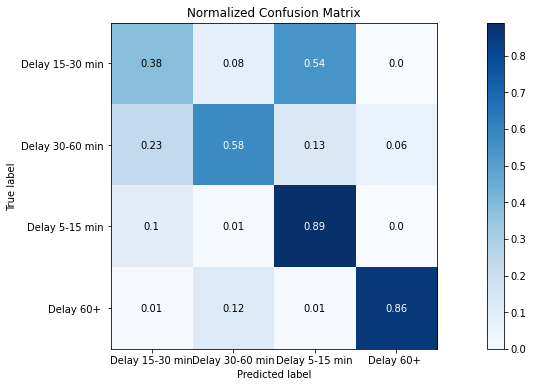

In [55]:
skplt.metrics.plot_confusion_matrix(y_rf_imbalanced_test, rf_imbalanced_pred, figsize=(18,6), normalize=True)
plt.show()

## Random Forest Model with SMOTE

In [56]:
x_rf_balanced_with_smote_train, x_rf_balanced_with_smote_test, y_rf_balanced_with_smote_train, y_rf_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [57]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_rf_balanced_with_smote_train_reshape, y_rf_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_rf_balanced_with_smote_train, y_rf_balanced_with_smote_train)

In [58]:
rf_balanced_with_smote= RandomForestClassifier().fit(x_rf_balanced_with_smote_train_reshape,                                                                                            y_rf_balanced_with_smote_train_reshape)
rf_balanced_with_smote_pred = rf_balanced_with_smote.predict(x_rf_balanced_with_smote_test)
rf_balanced_with_smote.score(x_rf_balanced_with_smote_test, y_rf_balanced_with_smote_test)

0.6809613052585162

In [59]:
print(classification_report(y_rf_balanced_with_smote_test, rf_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.54      0.43      0.48      7727
Delay 30-60 min       0.69      0.64      0.66      5325
 Delay 5-15 min       0.68      0.83      0.74     10274
     Delay 60+        0.93      0.85      0.89      3887

       accuracy                           0.68     27213
      macro avg       0.71      0.69      0.69     27213
   weighted avg       0.68      0.68      0.67     27213



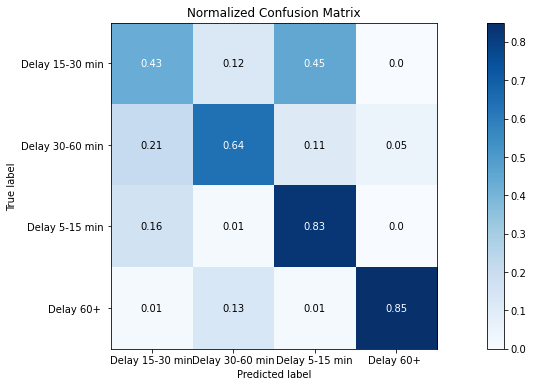

In [60]:
skplt.metrics.plot_confusion_matrix(y_rf_balanced_with_smote_test, rf_balanced_with_smote_pred, figsize=(18,6), normalize=True)
plt.show()

## Random Forest Feature Importance

In [61]:
len(rf_balanced_with_smote.feature_importances_)

200

In [62]:
rf_balanced_with_smote.feature_importances_

array([0.00000000e+00, 1.37242563e-02, 2.38704456e-02, 1.70540976e-02,
       3.45278206e-01, 6.20655220e-02, 4.23881044e-02, 2.43906233e-02,
       2.14456477e-02, 2.25961997e-02, 2.17140196e-02, 2.32268467e-02,
       2.44374514e-02, 3.99003831e-02, 4.80815353e-02, 4.14187318e-02,
       4.87894409e-02, 4.14640723e-03, 2.78457190e-03, 2.76788483e-04,
       1.26525936e-03, 1.23484448e-02, 2.14950513e-04, 1.39397072e-03,
       2.76180722e-04, 2.48643790e-03, 5.55352356e-04, 3.80760828e-03,
       1.41574595e-03, 5.90294058e-03, 7.92223784e-04, 1.85402884e-03,
       2.66425324e-04, 4.08971912e-04, 2.95035512e-04, 9.86980936e-05,
       4.62721142e-04, 7.23887649e-04, 3.71933242e-04, 1.55864951e-04,
       3.77669511e-05, 2.38355669e-04, 1.37266533e-03, 8.27949809e-04,
       1.06780927e-04, 7.32920240e-04, 8.89101353e-04, 4.07659344e-04,
       1.54585880e-03, 2.36928862e-03, 3.82013574e-04, 7.06574035e-04,
       2.78274153e-04, 4.91163346e-04, 6.44060511e-05, 2.08029863e-03,
      

In [63]:
pd.set_option('display.max_rows', None)
feature_importance_columns_rf_balanced_with_smote = feature_importance(rf_balanced_with_smote, x);
feature_importance_columns_rf_balanced_with_smote

,columns,importance
4,DEP_DELAY_NEW,0.345278
5,TAXI_OUT,0.062066
16,WHEELS_OFF_min,0.048789
14,DEP_TIME_min,0.048082
6,DISTANCE,0.042388
15,WHEELS_OFF_hour,0.041419
13,DEP_TIME_hour,0.039900
12,5Dk_max_rüzgar,0.024437
7,Ort_Rüzgar,0.024391
2,DAY_OF_MONTH,0.023870


In [64]:
feature_importance_drop_rf_balanced_with_smote = feature_importance_columns_rf_balanced_with_smote[feature_importance_columns_rf_balanced_with_smote.importance > 0.005]

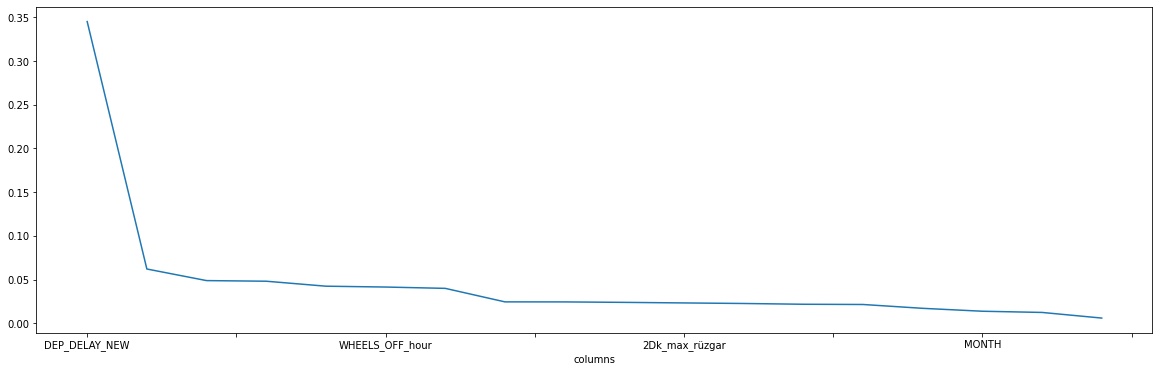

In [65]:
feature_importance_drop_rf_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [66]:
keep_columns_rf_balanced_with_smote = feature_importance_columns_rf_balanced_with_smote[feature_importance_columns_rf_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_rf_balanced_with_smote)

18

In [67]:
keep_columns_rf_balanced_with_smote

4       DEP_DELAY_NEW
5            TAXI_OUT
16     WHEELS_OFF_min
14       DEP_TIME_min
6            DISTANCE
15    WHEELS_OFF_hour
13      DEP_TIME_hour
12     5Dk_max_rüzgar
7          Ort_Rüzgar
2        DAY_OF_MONTH
11     2Dk_max_rüzgar
9                TMAX
10               TMIN
8        Ort_Sýcaklýk
3         DAY_OF_WEEK
1               MONTH
21      OP_CARRIER_DL
29      OP_CARRIER_WN
Name: columns, dtype: object

### Random Forest Feature Importance Model

In [68]:
df_keep_rf_balanced_with_smote = df[keep_columns_rf_balanced_with_smote]
x_rf_feature_importance = df_keep_rf_balanced_with_smote
y_rf_feature_importance = df['ARR_DELAY_NEW']
x_rf_feature_importance_train, x_rf_feature_importance_test, y_rf_feature_importance_train, y_rf_feature_importance_test =     train_test_split(x_rf_feature_importance, y_rf_feature_importance, test_size=0.30, shuffle=False)

In [69]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_rf_feature_importance_train_reshape, y_rf_feature_importance_train_reshape = smote_reshape.fit_resample(x_rf_feature_importance_train, y_rf_feature_importance_train)

In [70]:
rf_balanced_with_smote_feature_importance= RandomForestClassifier().fit(x_rf_feature_importance_train_reshape,                                                                                             y_rf_feature_importance_train_reshape)
rf_balanced_with_smote_feature_importance_pred = rf_balanced_with_smote_feature_importance.predict(x_rf_feature_importance_test)
rf_balanced_with_smote_feature_importance.score(x_rf_feature_importance_test, y_rf_feature_importance_test)

0.7130783081615404

In [71]:
print(classification_report(y_rf_feature_importance_test, rf_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.60      0.48      0.53      7727
Delay 30-60 min       0.75      0.65      0.69      5325
 Delay 5-15 min       0.69      0.87      0.77     10274
     Delay 60+        0.94      0.86      0.90      3887

       accuracy                           0.71     27213
      macro avg       0.74      0.71      0.72     27213
   weighted avg       0.71      0.71      0.71     27213



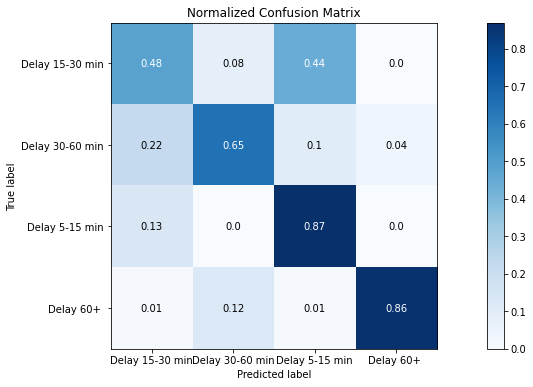

In [72]:
skplt.metrics.plot_confusion_matrix(y_rf_feature_importance_test, rf_balanced_with_smote_feature_importance_pred, figsize=(18,6), normalize=True)
plt.show()

# ExtraTrees

## ExtraTrees Base Model

In [73]:
x_ext_imbalanced_train, x_ext_imbalanced_test, y_ext_imbalanced_train, y_ext_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [74]:
ext_imbalanced= ExtraTreesClassifier().fit(x_ext_imbalanced_train,                                                                                                            y_ext_imbalanced_train)
ext_imbalanced_pred = ext_imbalanced.predict(x_ext_imbalanced_test)
ext_imbalanced.score(x_ext_imbalanced_test, y_ext_imbalanced_test)

0.6203652666005218

In [75]:
print(classification_report(y_ext_imbalanced_test, ext_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.47      0.32      0.38      7727
Delay 30-60 min       0.66      0.46      0.54      5325
 Delay 5-15 min       0.60      0.86      0.71     10274
     Delay 60+        0.85      0.81      0.83      3887

       accuracy                           0.62     27213
      macro avg       0.65      0.61      0.62     27213
   weighted avg       0.61      0.62      0.60     27213



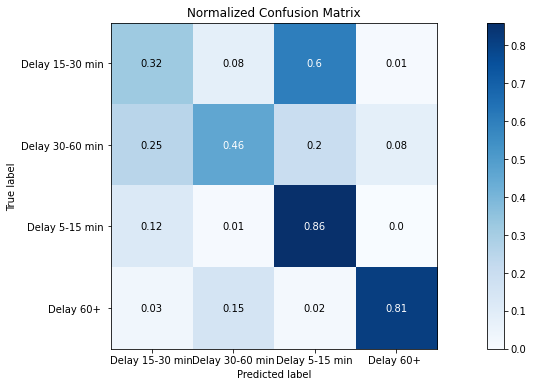

In [76]:
skplt.metrics.plot_confusion_matrix(y_ext_imbalanced_test, ext_imbalanced_pred, figsize=(18,6), normalize=True)
plt.show()

## ExtraTrees Model with SMOTE

In [77]:
x_ext_balanced_with_smote_train, x_ext_balanced_with_smote_test, y_ext_balanced_with_smote_train, y_ext_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [78]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ext_balanced_with_smote_train_reshape, y_ext_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_ext_balanced_with_smote_train, y_ext_balanced_with_smote_train)

In [79]:
ext_balanced_with_smote= ExtraTreesClassifier().fit(x_ext_balanced_with_smote_train_reshape,                                                                                           y_ext_balanced_with_smote_train_reshape)
ext_balanced_with_smote_pred = ext_balanced_with_smote.predict(x_ext_balanced_with_smote_test)
ext_balanced_with_smote.score(x_ext_balanced_with_smote_test, y_ext_balanced_with_smote_test)

0.6140080108771543

In [80]:
print(classification_report(y_ext_balanced_with_smote_test, ext_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.47      0.39      0.43      7727
Delay 30-60 min       0.56      0.55      0.55      5325
 Delay 5-15 min       0.65      0.74      0.69     10274
     Delay 60+        0.83      0.81      0.82      3887

       accuracy                           0.61     27213
      macro avg       0.63      0.62      0.62     27213
   weighted avg       0.61      0.61      0.61     27213



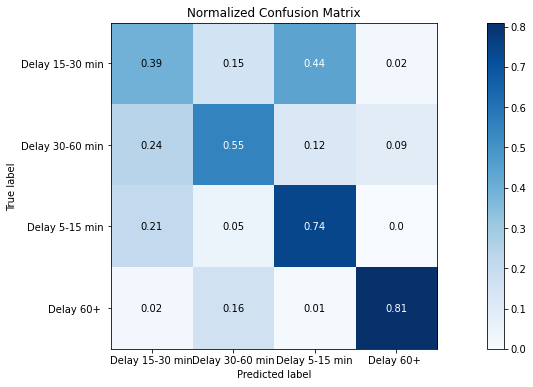

In [81]:
skplt.metrics.plot_confusion_matrix(y_ext_balanced_with_smote_test, ext_balanced_with_smote_pred, figsize=(18,6), normalize=True)
plt.show()

## ExtraTress Feature Importance

In [82]:
len(ext_balanced_with_smote.feature_importances_)

200

In [83]:
ext_balanced_with_smote.feature_importances_

array([0.00000000e+00, 2.09356027e-02, 2.75339815e-02, 2.38969898e-02,
       2.03129368e-01, 5.47677705e-02, 2.97821323e-02, 2.68458292e-02,
       2.61341805e-02, 2.62001262e-02, 2.63105686e-02, 2.69695009e-02,
       2.80511989e-02, 4.82874308e-02, 4.77660858e-02, 4.93805812e-02,
       4.91725966e-02, 4.67584946e-03, 3.28402632e-03, 3.25147511e-04,
       1.52129179e-03, 1.36486977e-02, 2.83439543e-04, 1.84505864e-03,
       4.03139776e-04, 3.22915989e-03, 7.75025824e-04, 4.22631303e-03,
       1.59933120e-03, 6.97608439e-03, 1.01575456e-03, 2.34693948e-03,
       5.54328855e-04, 6.98297868e-04, 6.19101433e-04, 1.36223995e-04,
       7.96594420e-04, 1.51144613e-03, 7.38879038e-04, 1.91674946e-04,
       5.26004750e-05, 4.27905718e-04, 2.34952201e-03, 1.49164686e-03,
       2.41596923e-04, 1.42064001e-03, 1.88560235e-03, 6.88548447e-04,
       2.95231013e-03, 3.69915890e-03, 6.60592114e-04, 1.19064574e-03,
       4.42516274e-04, 9.18968451e-04, 1.09875029e-04, 3.73598409e-03,
      

In [84]:
pd.set_option('display.max_rows', None)
feature_importance_columns_ext_balanced_with_smote = feature_importance(ext_balanced_with_smote, x);
feature_importance_columns_ext_balanced_with_smote

,columns,importance
4,DEP_DELAY_NEW,0.203129
5,TAXI_OUT,0.054768
15,WHEELS_OFF_hour,0.049381
16,WHEELS_OFF_min,0.049173
13,DEP_TIME_hour,0.048287
14,DEP_TIME_min,0.047766
6,DISTANCE,0.029782
12,5Dk_max_rüzgar,0.028051
2,DAY_OF_MONTH,0.027534
11,2Dk_max_rüzgar,0.026970


In [85]:
feature_importance_drop_ext_balanced_with_smote = feature_importance_columns_ext_balanced_with_smote[feature_importance_columns_ext_balanced_with_smote.importance > 0.005]

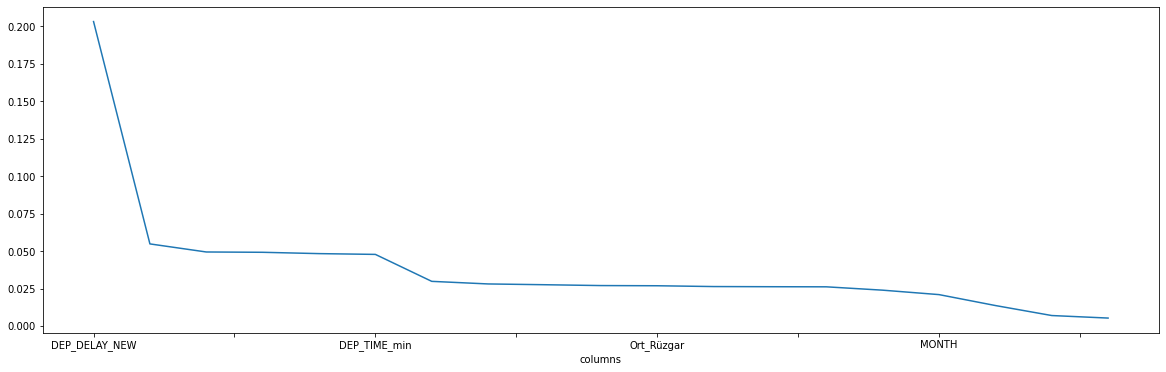

In [86]:
feature_importance_drop_ext_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [87]:
keep_columns_ext_balanced_with_smote = feature_importance_columns_ext_balanced_with_smote[feature_importance_columns_ext_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_ext_balanced_with_smote)

19

In [88]:
keep_columns_ext_balanced_with_smote

4       DEP_DELAY_NEW
5            TAXI_OUT
15    WHEELS_OFF_hour
16     WHEELS_OFF_min
13      DEP_TIME_hour
14       DEP_TIME_min
6            DISTANCE
12     5Dk_max_rüzgar
2        DAY_OF_MONTH
11     2Dk_max_rüzgar
7          Ort_Rüzgar
10               TMIN
9                TMAX
8        Ort_Sýcaklýk
3         DAY_OF_WEEK
1               MONTH
21      OP_CARRIER_DL
29      OP_CARRIER_WN
90           DEST_FLL
Name: columns, dtype: object

### ExtraTrees Feature Importance Model

In [89]:
df_keep_ext_balanced_with_smote = df[keep_columns_ext_balanced_with_smote]
x_ext_feature_importance = df_keep_ext_balanced_with_smote
y_ext_feature_importance = df['ARR_DELAY_NEW']
x_ext_feature_importance_train, x_ext_feature_importance_test, y_ext_feature_importance_train, y_ext_feature_importance_test =     train_test_split(x_ext_feature_importance, y_ext_feature_importance, test_size=0.30, shuffle=False)

In [90]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ext_feature_importance_train_reshape, y_ext_feature_importance_train_reshape = smote_reshape.fit_resample(x_ext_feature_importance_train, y_ext_feature_importance_train)

In [91]:
ext_balanced_with_smote_feature_importance= ExtraTreesClassifier().fit(x_ext_feature_importance_train_reshape,                                                                                             y_ext_feature_importance_train_reshape)
ext_balanced_with_smote_feature_importance_pred = ext_balanced_with_smote_feature_importance.predict(x_ext_feature_importance_test)
ext_balanced_with_smote_feature_importance.score(x_ext_feature_importance_test, y_ext_feature_importance_test)

0.6654907580935582

In [92]:
print(classification_report(y_ext_feature_importance_test, ext_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.52      0.45      0.48      7727
Delay 30-60 min       0.64      0.64      0.64      5325
 Delay 5-15 min       0.68      0.77      0.73     10274
     Delay 60+        0.91      0.85      0.88      3887

       accuracy                           0.67     27213
      macro avg       0.69      0.68      0.68     27213
   weighted avg       0.66      0.67      0.66     27213



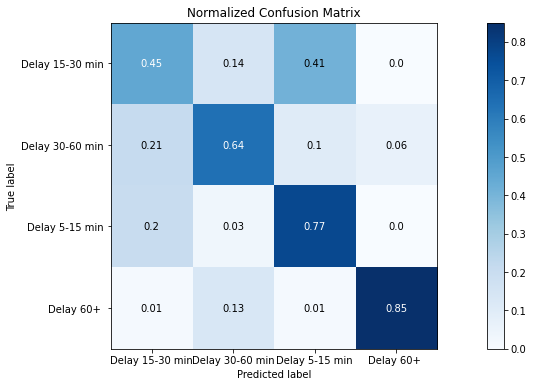

In [93]:
skplt.metrics.plot_confusion_matrix(y_ext_feature_importance_test, ext_balanced_with_smote_feature_importance_pred, figsize=(18,6), normalize=True)
plt.show()

# XGBoost

## XGBoost Base Model

In [94]:
x_xgb_imbalanced_train, x_xgb_imbalanced_test, y_xgb_imbalanced_train, y_xgb_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [95]:
xgb_imbalanced= XGBClassifier().fit(x_xgb_imbalanced_train, y_xgb_imbalanced_train)
xgb_imbalanced_pred = xgb_imbalanced.predict(x_xgb_imbalanced_test)
xgb_imbalanced.score(x_xgb_imbalanced_test, y_xgb_imbalanced_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[20:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpt

0.7235512438907875

In [96]:
print(classification_report(y_xgb_imbalanced_test, xgb_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.63      0.47      0.54      7727
Delay 30-60 min       0.77      0.65      0.71      5325
 Delay 5-15 min       0.69      0.90      0.78     10274
     Delay 60+        0.95      0.85      0.90      3887

       accuracy                           0.72     27213
      macro avg       0.76      0.72      0.73     27213
   weighted avg       0.73      0.72      0.71     27213



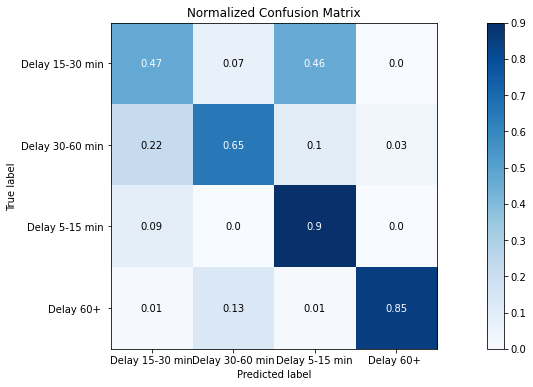

In [97]:
skplt.metrics.plot_confusion_matrix(y_xgb_imbalanced_test, xgb_imbalanced_pred, figsize=(18,6), normalize=True)
plt.show()

## XGBoost Model with SMOTE

In [98]:
x_xgb_balanced_with_smote_train, x_xgb_balanced_with_smote_test, y_xgb_balanced_with_smote_train, y_xgb_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [99]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_xgb_balanced_with_smote_train_reshape, y_xgb_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_xgb_balanced_with_smote_train, y_xgb_balanced_with_smote_train)

In [100]:
xgb_balanced_with_smote= XGBClassifier().fit(x_xgb_balanced_with_smote_train_reshape,                                                                                           y_xgb_balanced_with_smote_train_reshape)
xgb_balanced_with_smote_pred = xgb_balanced_with_smote.predict(x_xgb_balanced_with_smote_test)
xgb_balanced_with_smote.score(x_xgb_balanced_with_smote_test, y_xgb_balanced_with_smote_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[20:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpt

0.7273361996104802

In [101]:
print(classification_report(y_xgb_balanced_with_smote_test, xgb_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.64      0.47      0.54      7727
Delay 30-60 min       0.76      0.67      0.71      5325
 Delay 5-15 min       0.69      0.90      0.79     10274
     Delay 60+        0.95      0.85      0.90      3887

       accuracy                           0.73     27213
      macro avg       0.76      0.72      0.73     27213
   weighted avg       0.73      0.73      0.72     27213



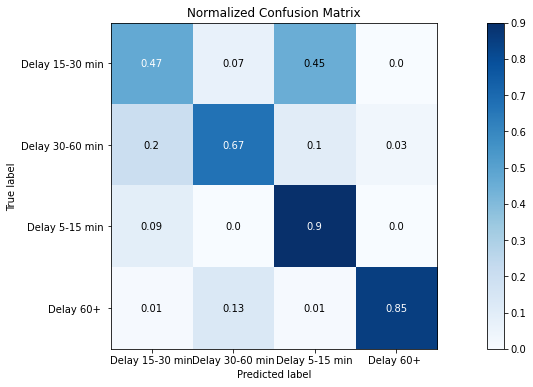

In [102]:
skplt.metrics.plot_confusion_matrix(y_xgb_balanced_with_smote_test, xgb_balanced_with_smote_pred, figsize=(18,6), normalize=True)
plt.show()

## XGBoot Feature Importance

In [103]:
len(xgb_balanced_with_smote.feature_importances_)

200

In [104]:
xgb_balanced_with_smote.feature_importances_

array([0.        , 0.0055028 , 0.00360522, 0.00328111, 0.15517208,
       0.03598039, 0.01031577, 0.00397858, 0.00452172, 0.00472926,
       0.00461976, 0.00604969, 0.00415559, 0.00442236, 0.00344096,
       0.00567338, 0.00341656, 0.00963425, 0.00825152, 0.        ,
       0.00377118, 0.02047561, 0.00436084, 0.00609382, 0.0027976 ,
       0.00978182, 0.00456378, 0.01021914, 0.00376769, 0.00720469,
       0.00532554, 0.00479097, 0.00228899, 0.00132123, 0.00230235,
       0.00146083, 0.00445912, 0.00274223, 0.00445563, 0.01009485,
       0.00129912, 0.00430369, 0.00663411, 0.00407817, 0.        ,
       0.00626497, 0.00162874, 0.00305548, 0.00541005, 0.00567843,
       0.00210463, 0.00311513, 0.00447484, 0.00401816, 0.        ,
       0.00465856, 0.00106393, 0.00452451, 0.00222657, 0.00532292,
       0.00352519, 0.00500381, 0.00356692, 0.00434038, 0.00497949,
       0.00434808, 0.00462558, 0.00143364, 0.        , 0.00304558,
       0.00386511, 0.006317  , 0.00412258, 0.0042917 , 0.00614

In [105]:
pd.set_option('display.max_rows', None)
feature_importance_columns_xgb_balanced_with_smote = feature_importance(xgb_balanced_with_smote, x);
feature_importance_columns_xgb_balanced_with_smote

,columns,importance
4,DEP_DELAY_NEW,0.155172
5,TAXI_OUT,0.035980
21,OP_CARRIER_DL,0.020476
6,DISTANCE,0.010316
27,OP_CARRIER_OO,0.010219
39,DEST_ANC,0.010095
25,OP_CARRIER_NK,0.009782
122,DEST_LGA,0.009687
17,OP_CARRIER_9E,0.009634
109,DEST_IAH,0.009522


In [106]:
feature_importance_drop_xgb_balanced_with_smote = feature_importance_columns_xgb_balanced_with_smote[feature_importance_columns_xgb_balanced_with_smote.importance > 0.005]

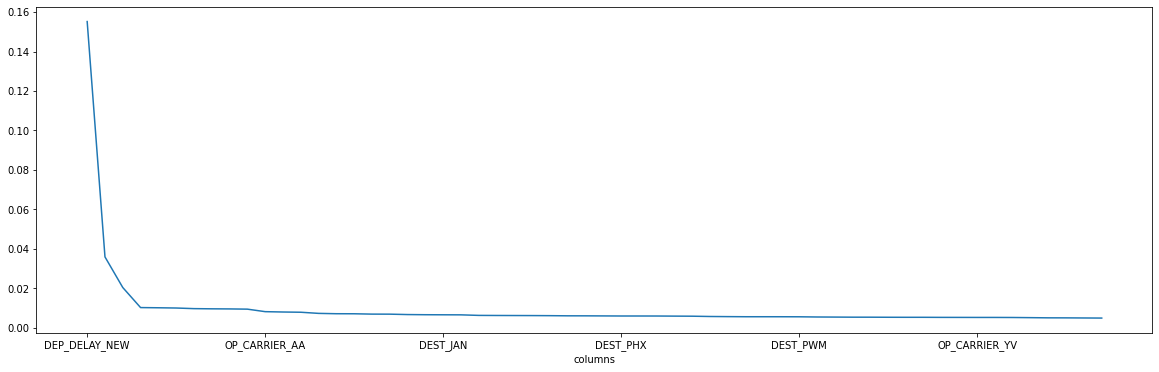

In [107]:
feature_importance_drop_xgb_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [108]:
keep_columns_xgb_balanced_with_smote = feature_importance_columns_xgb_balanced_with_smote[feature_importance_columns_xgb_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_xgb_balanced_with_smote)

58

In [109]:
keep_columns_xgb_balanced_with_smote

4        DEP_DELAY_NEW
5             TAXI_OUT
21       OP_CARRIER_DL
6             DISTANCE
27       OP_CARRIER_OO
39            DEST_ANC
25       OP_CARRIER_NK
122           DEST_LGA
17       OP_CARRIER_9E
109           DEST_IAH
18       OP_CARRIER_AA
151           DEST_PBI
90            DEST_FLL
108           DEST_IAD
29       OP_CARRIER_WN
176           DEST_SFO
119           DEST_LAX
154           DEST_PHL
129           DEST_MEM
140           DEST_MSP
115           DEST_JAN
42            DEST_AUS
126           DEST_MCO
71            DEST_DAL
117           DEST_JFK
45            DEST_BDL
107           DEST_HSV
74            DEST_DEN
135           DEST_MLI
23       OP_CARRIER_F9
155           DEST_PHX
11      2Dk_max_rüzgar
190           DEST_TPA
83            DEST_EVV
101           DEST_GTR
94            DEST_FWA
75            DEST_DFW
177           DEST_SGF
49            DEST_BOS
15     WHEELS_OFF_hour
161           DEST_PWM
170           DEST_SAN
1                MONTH
198        

### XGBoost Feature Importance Model

In [110]:
df_keep_xgb_balanced_with_smote = df[keep_columns_xgb_balanced_with_smote]
x_xgb_feature_importance = df_keep_xgb_balanced_with_smote
y_xgb_feature_importance = df['ARR_DELAY_NEW']
x_xgb_feature_importance_train, x_xgb_feature_importance_test, y_xgb_feature_importance_train, y_xgb_feature_importance_test =     train_test_split(x_xgb_feature_importance, y_xgb_feature_importance, test_size=0.30, shuffle=False)

In [111]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_xgb_feature_importance_train_reshape, y_xgb_feature_importance_train_reshape = smote_reshape.fit_resample(x_xgb_feature_importance_train, y_xgb_feature_importance_train)

In [112]:
xgb_balanced_with_smote_feature_importance= XGBClassifier().fit(x_xgb_feature_importance_train_reshape,                                                                                             y_xgb_feature_importance_train_reshape)
xgb_balanced_with_smote_feature_importance_pred = xgb_balanced_with_smote_feature_importance.predict(x_xgb_feature_importance_test)
xgb_balanced_with_smote_feature_importance.score(x_xgb_feature_importance_test, y_xgb_feature_importance_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[20:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpt

0.7240657038915225

In [113]:
print(classification_report(y_xgb_feature_importance_test, xgb_balanced_with_smote_feature_importance_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.63      0.47      0.54      7727
Delay 30-60 min       0.79      0.63      0.70      5325
 Delay 5-15 min       0.69      0.91      0.78     10274
     Delay 60+        0.95      0.86      0.90      3887

       accuracy                           0.72     27213
      macro avg       0.76      0.72      0.73     27213
   weighted avg       0.73      0.72      0.71     27213



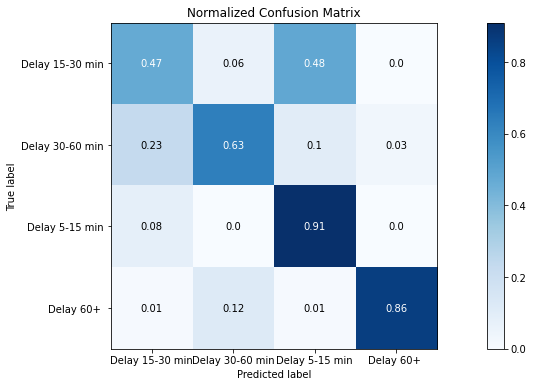

In [114]:
skplt.metrics.plot_confusion_matrix(y_xgb_feature_importance_test, xgb_balanced_with_smote_feature_importance_pred, figsize=(18,6),normalize=True)
plt.show()

# Voting - Gradient Boosting - Random Forest - ExtraTrees

## Voting - Random Forest - ExtraTrees Base Model

In [115]:
x_voting_imbalanced_train, x_voting_imbalanced_test, y_voting_imbalanced_train, y_voting_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [116]:
estimator = []
estimator.append(('rf', RandomForestClassifier()))
estimator.append(('ext', ExtraTreesClassifier()))

In [117]:
voting_imbalanced = VotingClassifier(estimators = estimator, voting ='soft').fit(x_voting_imbalanced_train,                                                                                                         y_voting_imbalanced_train)
voting_imbalanced_pred = voting_imbalanced.predict(x_voting_imbalanced_test)
voting_imbalanced.score(x_voting_imbalanced_test, y_voting_imbalanced_test)

0.6773600852533715

In [118]:
print(classification_report(y_voting_imbalanced_test, voting_imbalanced_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.55      0.37      0.44      7727
Delay 30-60 min       0.73      0.57      0.64      5325
 Delay 5-15 min       0.64      0.90      0.75     10274
     Delay 60+        0.91      0.85      0.88      3887

       accuracy                           0.68     27213
      macro avg       0.71      0.67      0.68     27213
   weighted avg       0.68      0.68      0.66     27213



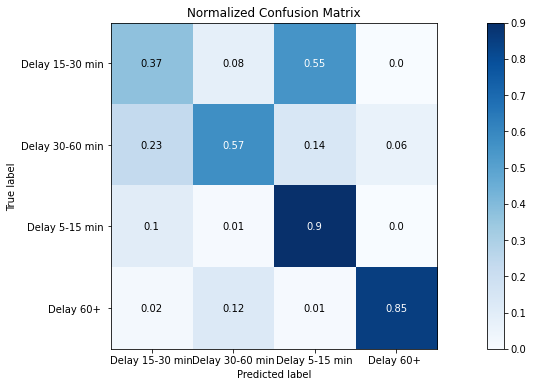

In [119]:
skplt.metrics.plot_confusion_matrix(y_voting_imbalanced_test, voting_imbalanced_pred, figsize=(18,6), normalize=True)
plt.show()

## Voting - Random Forest - ExtraTrees Model with SMOTE

In [120]:
x_voting_balanced_with_smote_train, x_voting_balanced_with_smote_test, y_voting_balanced_with_smote_train, y_voting_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [121]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_voting_balanced_with_smote_train_reshape, y_voting_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_voting_balanced_with_smote_train,                                                                                                y_voting_balanced_with_smote_train)

In [122]:
estimator = []
estimator.append(('rf', RandomForestClassifier()))
estimator.append(('ext', ExtraTreesClassifier()))

In [123]:
voting_balanced_with_smote = VotingClassifier(estimators = estimator, voting ='soft').fit                                                                       (x_voting_balanced_with_smote_train_reshape, y_voting_balanced_with_smote_train_reshape)
voting_balanced_with_smote_pred = voting_balanced_with_smote.predict(x_voting_imbalanced_test)
voting_balanced_with_smote.score(x_voting_balanced_with_smote_test, y_voting_balanced_with_smote_test)

0.67140704810201

In [124]:
print(classification_report(y_voting_balanced_with_smote_test, voting_balanced_with_smote_pred))

                 precision    recall  f1-score   support

Delay 15-30 min       0.53      0.42      0.47      7727
Delay 30-60 min       0.68      0.63      0.65      5325
 Delay 5-15 min       0.67      0.82      0.73     10274
     Delay 60+        0.91      0.85      0.88      3887

       accuracy                           0.67     27213
      macro avg       0.70      0.68      0.68     27213
   weighted avg       0.67      0.67      0.66     27213



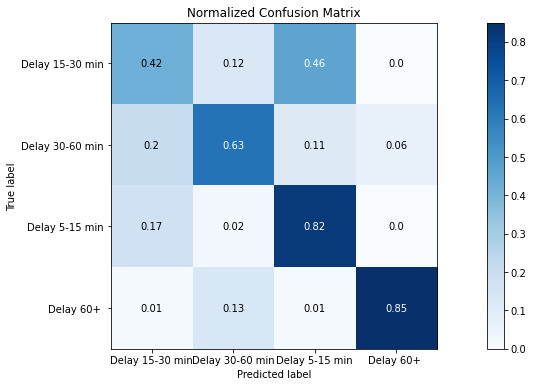

In [125]:
skplt.metrics.plot_confusion_matrix(y_voting_balanced_with_smote_test, voting_balanced_with_smote_pred, figsize=(18,6), normalize=True)
plt.show()